In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [39]:
df = pd.read_excel('test_data.xlsx')

In [55]:
df[df['gender_matching_score'] != 0]

,name_matching_score,nationality_matching_score,gender_matching_score,ground_confidence,age_matching_score
0,100,1.000000,0.901961,1,0
1,100,1.000000,0.400000,1,0
6,100,1.000000,1.000000,1,1
8,100,1.000000,1.000000,1,1
9,100,0.000000,1.000000,1,1
10,100,1.000000,1.000000,1,1
11,100,1.000000,1.000000,1,1
12,100,1.000000,1.000000,1,1
15,100,0.000000,1.000000,1,1
16,100,1.000000,1.000000,1,1


In [44]:
df = df[['name_matching_score','nationality_matching_score','gender_matching_score','ground_confidence','age_matching_score']]

In [54]:
df[(df['gender_matching_score'] == 1) & (df['ground_confidence'] == 0)]

,name_matching_score,nationality_matching_score,gender_matching_score,ground_confidence,age_matching_score


In [57]:
feature_cols = ['name_matching_score','nationality_matching_score','gender_matching_score']#,'age_matching_score']
X = df[feature_cols]

y = df.ground_confidence

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=555)

In [28]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

In [29]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0,  3],
       [ 0, 21]])

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 257.44, 'Predicted label')

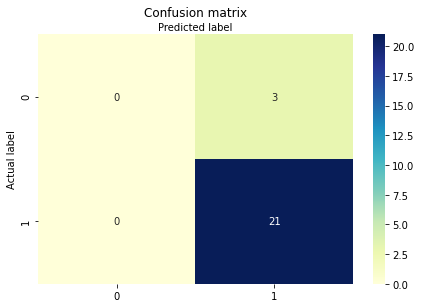

In [31]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
logreg

LogisticRegression()

In [58]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
X = add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.284443
         Iterations 8


In [59]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:      ground_confidence   No. Observations:                   93
Model:                          Logit   Df Residuals:                       89
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.1053
Time:                        15:40:30   Log-Likelihood:                -26.453
converged:                       True   LL-Null:                       -29.568
Covariance Type:            nonrobust   LLR p-value:                    0.1010
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        -11.4887     12.505     -0.919      0.358     -35.999      13.021
name_matching_score            0.1320      0.126      1.046      0.296      -0.115 

## Can see here that the p value at 5% confidence level, nationality, gender, age are not statistically significant.